# Data challenge template

#### Name

# Title
_________________________________________________________________________________________________________________

## Problem statement
_______________________________

### Summary
________________________________________

## Plan and considerations

(After you finish include:

Using X, I found...)
___________________________________

## Contents:

Section 1: Loading, examining, cleaning the data.

Section 2: Exploratory Data Analysis and Visualization

Section 3: Modeling

Section 4: Results and Conclusion 

_______________________________________

### Import known dependencies 

In [ ]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

# Set display options

%matplotlib inline
pd.options.display.max_columns = 150

Loading data

In [ ]:
# Load data
url=
data1 = pd.read_csv(url)

data2 = pd.read_csv('file.csv')

# Reading a csv file without the annoying index column
a = pd.read_csv("a.csv", index_col = 0)

# Naming columns for a dataframe
colnames= ['column1', 'column2', 'etc']
a.columns = colnames

display(data1.head())
display(data2.head())

In [ ]:
#counting the number of rows in your data
number_of_samples = df.count()

#viewing it
print("Number of samples:", str(number_of_samples))

In [ ]:
# Merge dataframes

#Combine two dataframes into one and use count
display(data1.count())
display(data2.count())

# Merge
data = data1.append(data2, ignore_index=True)
# Merge two dataframes
wines = pd.concat([red_wine, white_wine])
# Joining dataframes, SQL style
df = a.join(b, how = 'left', on = 'key')

display(data.count())

## Check out your data:
### (Preliminary)

In [ ]:
df.shape #number of rows X # columns

In [ ]:
df.info() #all the info (col names, dtypes, row #, missing values) 
# remember that nulls may still be present but just not detectable as such by Pandas (e.g. a "?")

In [ ]:
df.head(10) #first ten rows

In [ ]:
df.tail(100) #last 100 rows

In [ ]:
df.describe #descriptive stats for the df

In [ ]:
df.columns #what are the column names

In [ ]:
df.count() #count for each column

Basic descriptive statistics

In [ ]:
df.column_name.max()
df.column_name.min()
df.column_name.mean()
df.column_name.median()
df.column_name.mode()
df.column_name.sum()

Summarizing & cleaning data:

(More in-depth)

In [ ]:
# It's often helpful to have a count of unique values in each column:
def nunicol(df):
    summary = []
    for i in range(0, len(df.columns)):
        summary.append(df.iloc[:,i].nunique())
    
    summary = pd.DataFrame([summary])
    summary.columns = df.columns
    
    return summary

nunicol(df)

In [ ]:
# get the value_counts of each item in a column
data['title'].value_counts()[:20] #gets the first 20 most-frequently occurring titles

In [ ]:
# plot value_counts() in a bar chart- a frequency distribution
data['title'].value_counts()[:20].plot(kind='barh')

#After defining a function, apply the function to a column (or to all columns by not specifying a column) 
# and store it as a new column
data['referrer_len'] = data['referrer'].apply(get_referrer_length)


In [ ]:
## Make crosstab table for initial overview. Also exposes misspelled feature levels.
ct = pd.crosstab([df.feature_1, df.feature_2, df.feature_3], df.target, normalize='index')
ct.sort_values(by=1, ascending=False)

# normalize by 'index' gives percentages per row
# normalize by 'all' gives overall percentages
# to access a column, use e.g.: ct.iloc[:,-2]

In [ ]:
# standardizing spellings/typos using a dictionary
df.replace({'column_name' : { 'wrong_1' : 'correct_1', 'wrong_2': 'correct_2'}}, inplace=True)

# display levels after replacing misspellings
df.column_name.unique()

In [ ]:
# subset the attributes you want to look at
subset_attributes = ['residual sugar', 'total sulfur dioxide', 'sulphates', 'alcohol', 'volatile acidity', 'quality']

## using the attributes to look at each separately and then concat them together-
## this way you do not get the average for all data, but separately- this is why storing as 
## attributes was helpful
rs = round(red_wine[subset_attributes].describe(),2) # the ",2" tells it to rouns to two places after the decimal
ws = round(white_wine[subset_attributes].describe(),2)
pd.concat([rs, ws], axis=1, keys=['Red Wine Statistics', 'White Wine Statistics'])

In [ ]:
# checking out a series from a df
df['column_name'].head(5)

#checking out more than one from a df
df[['colName', 'colName']].head(10)

In [ ]:
#converting index to list to see first 10 elements
list(df.index)[:10]

In [ ]:
#look at rows 3-9
df[3:10]

In [ ]:
# look at specific columns and rows using their numerical (indexed) location (iloc)
# dataframe.iloc[start_row_index:not_inclusive_end_row_index, start_col_index:not_inclusive_end_col_index,]
df.iloc[3:5, 2:4]

In [ ]:
# BUT WAIT
# This one is odd for python, the end of the range IS inclusive in this case (when you use .loc)
# row numbers and column names
df.loc[3:5, ['colName','colName2']]

Filtering the info to view specific data
Filtering is done by passing a Boolean Series to the DataFrame. This Boolean Series can be generated by applying operations to other Series in the DataFrame and can be combined in many ways.

AND is given by & OR is given by | NOT is given by ~

Parentheses are important --these operators take precedence. A > 1 & B > 2 will be parsed as A > (1 & B) > 2 , this will fail because 1 & B doesn't mean anything alone.

In [ ]:
(df.year > 2014 ).head() #returns a Boolean for every value of rows in the head for which the year column is > 2014

#But, if you do this:

df[df.year >= 2014].head(15)

#You will get a df (with all the columns) with the first 15 rows of the dataframe for which the year column
# is >= 2014

In [ ]:
#combining filters

df[(df.year >= 2014) & (df.species == 'Gorilla gorilla') & ~(df.subspecies == 'berengei')].head(10)
# Give me the first ten rows in the df where the year is >= 2014 AND the species is Gorilla gorilla 
# AND the subspecies is NOT berengei 
# G.g. berengei are Mountain Gorillas :)

In [ ]:
#change values using a filter
#AHH 2024 should have been 2014, here is how I fix this
myfilter = (df.year == 2024)
df.loc[myfilter, 'year'] = 2014

Drop it like it's hot

In [ ]:
df.drop(['year'], axis=1).head(5) #show me first 5 rows with year column dropped
df=df.drop(['year'], axis=1) #drop the entire year column from the whole df

In [ ]:
# Drop duplicates in a column
df[['year']].drop_duplicates().head(10) # show me first 10 unique years in the df

# Drop all rows with Na values
df.dropna(axis=0)

Sort_values

In [ ]:
# sort by these columns first by the column values then by the rows (the [1,0])
df.sort_values(by = ['year', 'species'], ascending = [1, 0]).head()

Fill NA - Missing values

In [ ]:
df.fillna(-1).head() #fill missing values with -1

In [ ]:
# are there any missing values? returns boolean
df.isna()
df.isnull()

Grouping

In [ ]:
# Merging data frames
combined_df = pd.merge(df1, df2, on='column_with_matching_data_in_both_dfs', how='outer')

# outer keeps all rows
# and will fill in missing data with NaNs, inner will only have rows of df1 and the matches that were in df2 
# (anything in df2 that isn't in the column you matched on in df1 will not be included)

# good to check and make sure you did this correctly, e.g. if you want ALL the samples, make sure the new (merged) 
# df has the same count as the df (df1 or df2) with the larger # of rows

#check
num_combined = combined_df.count()
print('Number of combined:', str(num_combined))

In [ ]:
# make a column with new values based on values in another column 

def label_col (row):
   if row['up_to_date'] == 1 :
      return 0
   if row['up_to_date'] == 0 :
      return 1
   
df.apply (lambda row: label_col (row),axis=1)
#if you like the results then run it again and create a new col in the df with the results:
df['new_col'] = df.apply (lambda row: label_col (row),axis=1)

Graphs and Plots

In [ ]:
# Function to visualize distributions
def plot_with_fill(x, y, label):
    lines = plt.plot(x, y, label=label, lw=2)
    plt.fill_between(x, 0, y, alpha=0.2, color=lines[0].get_c())
    plt.legend(loc='best')
In [ ]:
'''To get pdf for beta distribution
PDF is a function, whose value at any given sample (or point) in the sample space 
(the set of possible values taken by the random variable) can be interpreted as providing 
a relative likelihood that the value of the random variable would equal that sample.
'''
def get_pdf(x, site):
    ''' 
    Parameters
    -----------
    x : Array of x values
    site : Array cooresponding to the site in question

    Returns
    --------
    numpy array
    '''
    alpha = sum(site)
    beta = len(site) - alpha
    return scs.beta(a=alpha, b=beta).pdf(x)

Start by looking only at converstion rate for old price. We assume a uniform prior, i.e., probability of 0 or 1 equally likely. Specifically, we use a beta distribution with alpha=1 and beta=1

In [ ]:
#make a bunch of different plots at once
features=[#column names go in here]
fig=plt.subplots(figsize=(10,15))
for i, j in enumerate(features):
    plt.subplot(4, 2, i+1)
    plt.subplots_adjust(hspace = 1.0)
    sns.countplot(x=j,df)
    plt.xticks(rotation=90)
    plt.title("Title")

Dealing with Missing Data

In [ ]:
# Look at the % of missing data per 

total = data2.isnull().sum().sort_values(ascending=False)
percent = (data2.isnull().sum()/data2.isnull().count()).sort_values(ascending=False)
missing_data = pd.concat([total, percent], axis=1, keys=['Total', 'Percent'])
missing_data

In [ ]:
# count NaNs in dataframe by column
df.isnull().sum(axis=0)

In [ ]:
# removing rows or columns with NaNs
df.dropna(axis=0, inplace=True) # axis=0 for rows, axis=1 for columns

In [ ]:
# Mean imputation
df.column.fillna(df.column.mean(), inplace=True)

In [ ]:
# Imputation using sklearn
from sklearn.impute import SimpleImputer

imp = SimpleImputer(missing_values=np.nan, strategy='mean') # or 'median', 'most_frequent', 'constant'
# filling the dataframe
df_imped = imp.fit_transform(df)

# when dealing with separate train/test sets, carry out fit and transfor separately:
imp.fit(X_train)
X_test = imp.transform(X_test)

#### Missingno
Once you are sure the weird values that weren't read in as NaNs but should have been are corrected, you can use the missingno module to look at the missing data.

In [ ]:
# From: https://github.com/ResidentMario/missingno
import missingno as msno
%matplotlib inline
import pandas as pd
import numpy as np

#### Docs description:
##### The msno.matrix nullity matrix is a data-dense display which lets you quickly visually pick out patterns in data completion.

*** If data isn't technically missing (from the computer's perspective) but IS missing in reality (e.g., it is filled in with a "?" or something else that Pandas did not know to interpret as NaN), missingno is not helpful. You still need to make sure all the NaNs are read and interpreted as NaNs.

** White= missing, black = not missing

From the docs: At a glance, date, time, the distribution of injuries, and the contribution factor of the first vehicle appear to be completely populated, while geographic information seems mostly complete, but spottier.

The sparkline at right summarizes the general shape of the data completeness and points out the maximum and minimum rows.

This visualization will comfortably accommodate up to 50 labelled variables. Past that range labels begin to overlap or become unreadable, and by default large displays omit them.

In [ ]:
# msno matrix
msno.matrix(df.sample(250))

If you are working with time-series data, you can specify a periodicity using the freq keyword parameter:

In [ ]:
null_pattern = (np.random.random(1000).reshape((50, 20)) > 0.5).astype(bool)
null_pattern = pd.DataFrame(null_pattern).replace({False: None})
msno.matrix(null_pattern.set_index(pd.period_range('1/1/2011', '2/1/2015', freq='M')) , freq='BQ')

From the docs.:

Bar provides the same information as matrix, but in a simpler format.

You can switch to a logarithmic scale by specifying log=True.

In [ ]:
# How many nulls per column?
msno.bar(df.sample(1000))

From the docs.:

Heatmap

The missingno correlation heatmap measures nullity correlation: how strongly the presence or absence of one variable affects the presence of another:

In [ ]:
msno.heatmap(df)

From the docs.:

Nullity correlation ranges from -1 (if one variable appears the other definitely does not) to 0 (variables appearing or not appearing have no effect on one another) to 1 (if one variable appears the other definitely also does).

Variables that are always full or always empty have no meaningful correlation, and so are silently removed from the visualization—in this case for instance the datetime and injury number columns, which are completely filled, are not included.

Entries marked <1 or >-1 are have a correlation that is close to being exactingly negative or positive, but is still not quite perfectly so. This points to a small number of records in the dataset which are erroneous. For example, in this dataset the correlation between VEHICLE CODE TYPE 3 and CONTRIBUTING FACTOR VEHICLE 3 is <1, indicating that, contrary to our expectation, there are a few records which have one or the other, but not both. These cases will require special attention.

The heatmap works great for picking out data completeness relationships between variable pairs, but its explanatory power is limited when it comes to larger relationships and it has no particular support for extremely large datasets.
________________________________________

In [ ]:
# re-shuffle records just to randomize data points
wines = wines.sample(frac=1, random_state=42).reset_index(drop=True)

## First-pass summary

In [ ]:
#convert to pandas
import numpy as np
# features
df = pd.DataFrame(df_array.data)
df.columns = df_array.feature_names
# target
df['target'] = df_array.target

In [ ]:
# for further processing, if an array is needed
target_array = df['target'].values

In [ ]:
# What to do with categorical data? Sometimes making these can simplify the analysis.
# have to make artificial categories for this dataset
# this makes a variable 'class' based off of Age.
def label_AGE (row):
    if row['AGE'] < 40:
        return "young"
    else:
        return 'old'

In [ ]:
df['class'] = df.apply(lambda row: label_AGE (row),axis=1)

In [ ]:
# Dimensions
df.shape

In [ ]:
# head, always a good one
df.head(10)

In [ ]:
# summary statistics
# excludes categorical variables
# note 'class' excluded for this reason
df.describe()

In [ ]:
# may want to check for imbalanced classes
# useful if there are only a few target categories
# in this dataset, not super useful
df.groupby('target').size().head(10)

In [ ]:
df.groupby('class').size()

In [ ]:
# does something similar
df['class'].value_counts()

In [ ]:
# if you have many categorical variables, it might help to see if some are misspelled
set(df['class'])

In [ ]:
# data types
df.info()

In [ ]:
# missing data by column
len(df.index)-df.count()

In [ ]:
# subset for only data that is present (remove all lines where 'class' is NA)
df[df['class'].notnull()].head()

In [ ]:
# Check for duplicate values
data2.duplicated().values.any()

In [ ]:
# replace suspicious numbers on ends of scales
s = sorted(df['CRIM'])
print(s[-5:])
print(s[:5])
import numpy as np
# replace with None
# df['CRIM'] = np.where((df['CRIM']==88.9762), None, df['CRIM'])
# print([pos for pos, item in enumerate(df['CRIM']) if item == None])

In [ ]:
# remove outliers for a specific column
# be sure to specify the quantile. The cutoff is up to you.
upper = df['TAX'].quantile(0.99) ; print(upper)
lower = df['TAX'].quantile(0.01) ; print(lower)
df[((df['TAX'] > lower) & (df['TAX'] < upper))].head()

In [ ]:
# Pandas aggregation with only one function:
df_by_color = df_nn.groupby(['color'])['yc_g', 'yr_g', 'rc_g', 'red'].mean()
                                                
# to convert hierarchical index to normal dataframe
df_by_color = df_by_color.reset_index()

In [ ]:
# Aggregating data if you have a data set with dyads or variables you want to group by that are in more than one row in a column (e.g., the red-cards data set)
aggregation = {
    'weight': {
        'comb_weight': 'mean'
    },
    'height': {
        'comb_height': 'mean'
    },
    'games': {
        'total_games': 'sum',
        'num_refs': 'count'
    },
    'victories': {
        'total_wins': 'sum'
    },
    'ties': {
        'total_ties': 'sum'
    },
    'defeats': {
        'total_loss': 'sum'
    },
    'goals': {
        'total_goals': 'sum'
    },
    'yellowCards': {
        'total_yellows': 'sum'
    },
    'yellowReds': {
        'total_yellowreds': 'sum'
    },
    'redCards': {
        'total_reds': 'sum'
    },
    'avg_rate': {
        'combined_rate': 'mean'
    }
}

player_data = data.groupby(['playerShort']).agg(aggregation)
display(player_data)
display(player_data.info())
#player_data.columns = player_data.columns.get_level_values(0)
#player_data.rename(index = str, columns = {('games', 'total_games'): 'total_games',
#                                           ('games', 'num_refs'): 'num_refs', 
#                                           ('victories', 'total_wins') : 'total_wins', 
#                                           ('defeats', 'total_loss') : 'total_loss',
#                                           ('ties', 'total_ties') : 'total_ties',
#                                           ('goals', 'total_goals'): 'total_goals', 
#                                           ('yellowCards', 'total_yellows') : 'total_yellows',
#                                           ('yellowReds', 'total_yellowreds') :'total_yellowreds',
#                                           ('redCards', 'total_reds') : 'total_reds',
#                                           ('avg_rate','combined_rate') : 'combined_rate'},
#                  inplace=True)
#display(player_data.columns)
#display(player_data.head())

In [ ]:
# Make new columns in the DF based on values in other columns already in the DF
def card_rate(yellows, yellowreds, reds, games):
    yellow_rate = yellows/games
    yellowred_rate = yellowreds/games
    red_rate = reds/games
    return yellow_rate, yellowred_rate, red_rate

player_data[['yellow_rate', 'yellowred_rate', 'red_rate']] = player_data.apply(lambda row: 
                                                                      pd.Series(
                                                                      card_rate(row.iloc[8],
                                                                               row.iloc[9],
                                                                               row.iloc[10],
                                                                               row.iloc[2])),
                                                                      axis=1)

display(player_data.head())

In [ ]:
# Add columns back to a df 
data[['yellow_rate', 'yellowred_rate', 'red_rate']] = data.apply(lambda row: 
                                                                 pd.Series(
                                                                     card_rate(row['yellowCards'],
                                                                               row['yellowReds'],
                                                                               row['redCards'],
                                                                               row['games'])),
                                                                      axis=1)

display(data.head())


In [ ]:
# Graphing after a group-by
# Visualize this a bit
data6 = data2.groupby('skin_tone')['total_reds'].agg(['sum','count'])
data6['percent'] = data6['sum'] / data6['count']
data6.reset_index(inplace=True) # USEFUL HOW TO GRAPH GROUPBY STUFF IN FUTURE 
plt.figure(figsize=(17,3))
plt.title('Frequency Distribution of Red Cards', fontsize = 14)
plt.ylabel('Number of Occurrences', fontsize=12)
plt.xlabel('Skin Tone', fontsize=12)
sns.barplot(x = "skin_tone", y = "sum", data = data6)

In [ ]:
#quick visualization
import seaborn as sns
import matplotlib.pyplot as plt

# everything
# sns.pairplot(df, kind="scatter")

# histogram
sns.distplot(df["AGE"], bins=20)

# basic scatterplot - both continous
sns.regplot(x=df["NOX"], y=df["AGE"], fit_reg=False)

# basic counts-by-category
sns.catplot(y="class", kind="count", palette="pastel", data=df)
sns.catplot(x="class", kind="count", palette="pastel", data=df)

# continuous and categorical
sns.catplot(x="class", y="NOX", palette="dark", data=df)
sns.catplot(x="class", y="NOX", palette="dark", data=df, kind='box')

# corr heatmap
corr = df.corr()
sns.heatmap(corr, 
            xticklabels=corr.columns.values,
            yticklabels=corr.columns.values)

# Jointplot
sns.jointplot(x = 'skinTone', y = 'RCRate', data = df)

# Frequency bar chart
plt.hist(df['avg_rate'])
plt.xlabel("avg skin tone rating")
plt.ylabel("Frequency")

# Two bar charts next to each other
sns.catplot("red_yes", col="dark",data=df_player, kind="count")

# Nested bar-chart
# Draw a nested barplot to show survival for class and sex
g = sns.catplot(x="leagueCountry", y="total_reds", hue="dark", data=df_player,
                height=6, kind="bar", palette="muted")
g.despine(left=True)
g.set_ylabels("number of redcards received")


# Create a contingency table which simply sums up the yes/no tallies
group_redyes=df_player.groupby(['red_yes', 'dark'], as_index=False)['player'].count()

g = sns.catplot(x="dark", y="player", hue="red_yes", data=group_redyes,
                height=6, kind="bar", palette="muted")
g.despine(left=True)
g.set_ylabels("number of players")

# Box plot
sns.boxplot(data=df_player, x='avg_rate', y='total_reds')

# Violin plot
sns.violinplot(x='color', y='red',  data=df_by_playerColor, inner='point')

In [ ]:
# Cross-tab summary
c_tab=pd.crosstab(df_player.red_yes > 0, df_player.dark > 0)
c_tab

Series, DataFrames and Indices
Pandas Series: Basically it is one column of the DataFrame. (An indexed, one-dimensional array with a dtype (int, float, str, etc.).

Conversely, a Pandas DF is a collection of Series with a common index (or joined on the index if you join series to a df or join multiple series to create a df). Each series can have a diff. dtype.

There are two types of probability distributions, discrete and continuous probability distributions.
Discrete probability distributions are also called as probability mass functions. Some examples of discrete probability distributions are  Bernoulli distribution,  Binomial distribution, Poisson distribution and Geometric distribution.
Continuous probability distributions also known as probability density functions, they are functions that take on continuous values (e.g. values on the real line). Examples include the normal distribution, the exponential distribution and the beta distribution.
To understand more about discrete and continuous random variables, watch Khan academies probability distribution videos.

# For continuous variables

In [ ]:
#Find the distribution of your data

In [34]:
%matplotlib inline

import warnings
import numpy as np
import pandas as pd
import scipy.stats as st
import statsmodels as sm
import matplotlib
import matplotlib.pyplot as plt

matplotlib.rcParams['figure.figsize'] = (16.0, 12.0)
matplotlib.style.use('ggplot')

In [35]:
# Create models from CONTINUOUS data
def best_fit_distribution(data, bins=200, ax=None):
    """Model data by finding best fit distribution to data"""
    # Get histogram of original data
    y, x = np.histogram(data, bins=bins, density=True)
    x = (x + np.roll(x, -1))[:-1] / 2.0

    # Distributions to check
    DISTRIBUTIONS = [        
        st.alpha,st.anglit,st.arcsine,st.beta,st.betaprime,st.bradford,st.burr,st.cauchy,st.chi,st.chi2,st.cosine,
        st.dgamma,st.dweibull,st.erlang,st.expon,st.exponnorm,st.exponweib,st.exponpow,st.f,st.fatiguelife,st.fisk,
        st.foldcauchy,st.foldnorm,st.frechet_r,st.frechet_l,st.genlogistic,st.genpareto,st.gennorm,st.genexpon,
        st.genextreme,st.gausshyper,st.gamma,st.gengamma,st.genhalflogistic,st.gilbrat,st.gompertz,st.gumbel_r,
        st.gumbel_l,st.halfcauchy,st.halflogistic,st.halfnorm,st.halfgennorm,st.hypsecant,st.invgamma,st.invgauss,
        st.invweibull,st.johnsonsb,st.johnsonsu,st.ksone,st.kstwobign,st.laplace,st.levy,st.levy_l,st.levy_stable,
        st.logistic,st.loggamma,st.loglaplace,st.lognorm,st.lomax,st.maxwell,st.mielke,st.nakagami,st.ncx2,st.ncf,
        st.nct,st.norm,st.pareto,st.pearson3,st.powerlaw,st.powerlognorm,st.powernorm,st.rdist,st.reciprocal,
        st.rayleigh,st.rice,st.recipinvgauss,st.semicircular,st.t,st.triang,st.truncexpon,st.truncnorm,st.tukeylambda,
        st.uniform,st.vonmises,st.vonmises_line,st.wald,st.weibull_min,st.weibull_max,st.wrapcauchy
    ]

    # Best holders
    best_distribution = st.norm
    best_params = (0.0, 1.0)
    best_sse = np.inf

    # Estimate distribution parameters from data
    for distribution in DISTRIBUTIONS:

        # Try to fit the distribution
        try:
            # Ignore warnings from data that can't be fit
            with warnings.catch_warnings():
                warnings.filterwarnings('ignore')

                # fit dist to data
                params = distribution.fit(data)

                # Separate parts of parameters
                arg = params[:-2]
                loc = params[-2]
                scale = params[-1]

                # Calculate fitted PDF and error with fit in distribution
                pdf = distribution.pdf(x, loc=loc, scale=scale, *arg)
                sse = np.sum(np.power(y - pdf, 2.0))

                # if axis pass in add to plot
                try:
                    if ax:
                        pd.Series(pdf, x).plot(ax=ax)
                    end
                except Exception:
                    pass

                # identify if this distribution is better
                if best_sse > sse > 0:
                    best_distribution = distribution
                    best_params = params
                    best_sse = sse

        except Exception:
            pass

    return (best_distribution.name, best_params)

In [36]:
def make_pdf(dist, params, size=10000):
    """Generate distributions's Probability Distribution Function """

    # Separate parts of parameters
    arg = params[:-2]
    loc = params[-2]
    scale = params[-1]

    # Get sane start and end points of distribution
    start = dist.ppf(0.01, *arg, loc=loc, scale=scale) if arg else dist.ppf(0.01, loc=loc, scale=scale)
    end = dist.ppf(0.99, *arg, loc=loc, scale=scale) if arg else dist.ppf(0.99, loc=loc, scale=scale)

    # Build PDF and turn into pandas Series
    x = np.linspace(start, end, size)
    y = dist.pdf(x, loc=loc, scale=scale, *arg)
    pdf = pd.Series(y, x)

    return pdf

In [37]:
data = pd.Series(sm.datasets.elnino.load_pandas().data.set_index('YEAR').values.ravel())


In [38]:
data.head()

0    23.11
1    24.20
2    25.37
3    23.86
4    23.03
dtype: float64

Text(0,0.5,'Frequency')

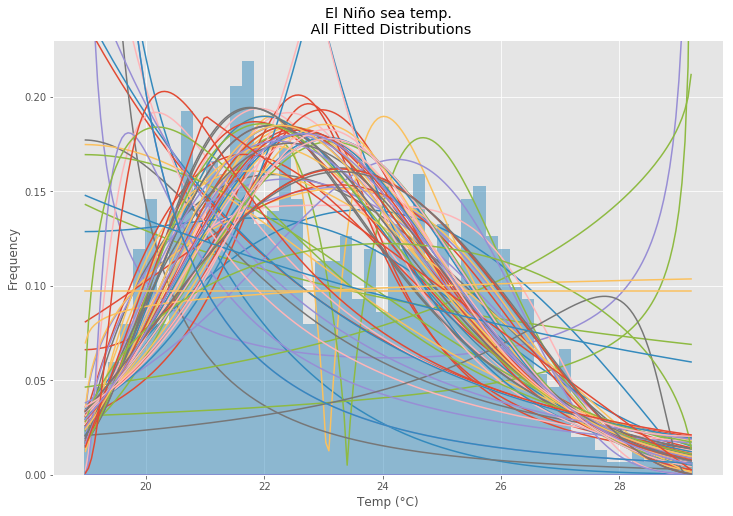

In [39]:
# Load data from statsmodels datasets
data = pd.Series(sm.datasets.elnino.load_pandas().data.set_index('YEAR').values.ravel())

# Plot for comparison
plt.figure(figsize=(12,8))
ax = data.plot(kind='hist', bins=50, density=True, alpha=0.5, color= [color['color'] for color in list(plt.rcParams['axes.prop_cycle'])][1])
# Save plot limits
dataYLim = ax.get_ylim()

# Find best fit distribution
best_fit_name, best_fit_params = best_fit_distribution(data, 200, ax)
best_dist = getattr(st, best_fit_name)

# Update plots
ax.set_ylim(dataYLim)
ax.set_title(u'El Niño sea temp.\n All Fitted Distributions')
ax.set_xlabel(u'Temp (°C)')
ax.set_ylabel('Frequency')

Text(0,0.5,'Frequency')

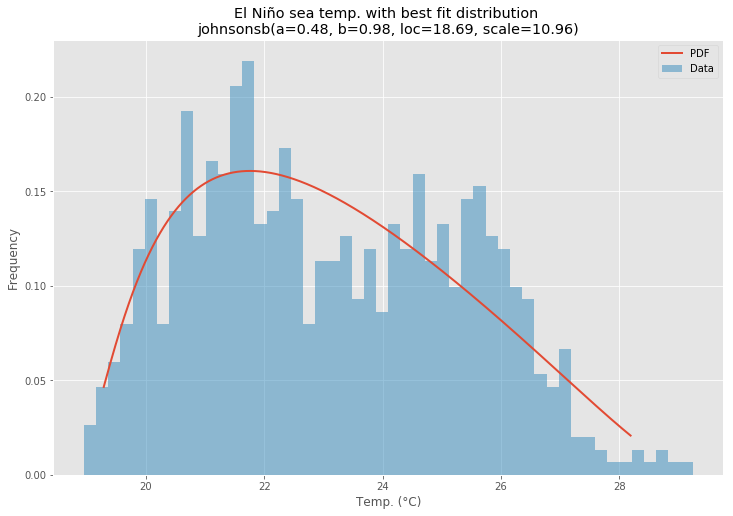

In [40]:
# Find best fit distribution
best_fit_name, best_fit_params = best_fit_distribution(data, 200, ax)
best_dist = getattr(st, best_fit_name)

# Update plots
ax.set_ylim(dataYLim)
ax.set_title(u'El Niño sea temp.\n All Fitted Distributions')
ax.set_xlabel(u'Temp (°C)')
ax.set_ylabel('Frequency')

# Make PDF with best params 
pdf = make_pdf(best_dist, best_fit_params)

# Display
plt.figure(figsize=(12,8))
ax = pdf.plot(lw=2, label='PDF', legend=True)
data.plot(kind='hist', bins=50, density=True, alpha=0.5, label='Data', legend=True, ax=ax)

param_names = (best_dist.shapes + ', loc, scale').split(', ') if best_dist.shapes else ['loc', 'scale']
param_str = ', '.join(['{}={:0.2f}'.format(k,v) for k,v in zip(param_names, best_fit_params)])
dist_str = '{}({})'.format(best_fit_name, param_str)

ax.set_title(u'El Niño sea temp. with best fit distribution \n' + dist_str)
ax.set_xlabel(u'Temp. (°C)')
ax.set_ylabel('Frequency')

In [46]:
# Test for normal distribution
# generate gaussian data
from numpy.random import seed
from numpy.random import randn
from numpy import mean
from numpy import std
# seed the random number generator
seed(1)
# generate univariate observations
data = 5 * randn(100) + 50
# summarize
print('mean=%.3f stdv=%.3f' % (mean(data), std(data)))

mean=50.303 stdv=4.426


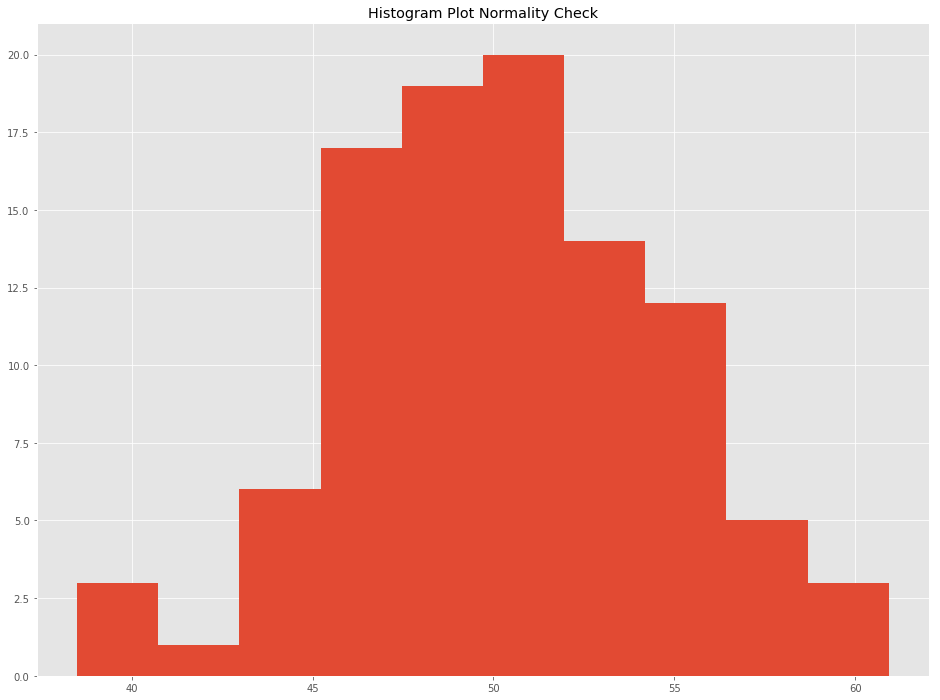

In [43]:
# histogram plot
from numpy.random import seed
from numpy.random import randn
from matplotlib import pyplot
# seed the random number generator
seed(1)
# generate univariate observations
data = 5 * randn(100) + 50
# histogram plot
label='Histogram Plot Normality Check'
pyplot.hist(data)
matplotlib.pyplot.title(label, fontdict=None, loc='center', pad=None)
pyplot.show()

## Quantile-Quantile Plot

Another popular plot for checking the distribution of a data sample is the quantile-quantile plot, Q-Q plot, or QQ plot for short.

##### This plot generates its own sample of the idealized distribution that we are comparing with, in this case the Gaussian distribution. The idealized samples are divided into groups (e.g. 5), called quantiles. Each data point in the sample is paired with a similar member from the idealized distribution at the same cumulative distribution.

The resulting points are plotted as a scatter plot with the idealized value on the x-axis and the data sample on the y-axis.

##### A perfect match for the distribution will be shown by a line of dots on a 45-degree angle from the bottom left of the plot to the top right. Often a line is drawn on the plot to help make this expectation clear. Deviations by the dots from the line shows a deviation from the expected distribution.

We can develop a QQ plot in Python using the qqplot() statsmodels function. The function takes the data sample and by default assumes we are comparing it to a Gaussian distribution. We can draw the standardized line by setting the ‘line‘ argument to ‘s‘.

A complete example of plotting the test dataset as a QQ plot is provided below.

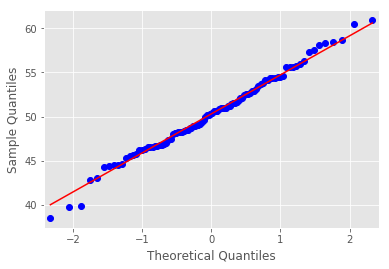

In [25]:
# QQ Plot
from numpy.random import seed
from numpy.random import randn
from statsmodels.graphics.gofplots import qqplot
from matplotlib import pyplot
# QQ Plot
from numpy.random import seed
from numpy.random import randn
from statsmodels.graphics.gofplots import qqplot
from matplotlib import pyplot
# seed the random number generator
seed(1)
# generate univariate observations
data = 5 * randn(100) + 50
# q-q plot
qqplot(data, line='s')
pyplot.show()

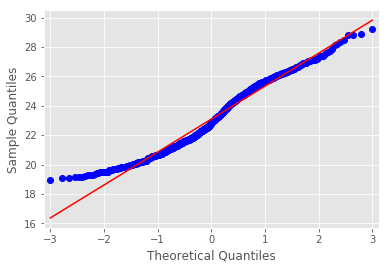

In [26]:
# Load data from statsmodels datasets
data = pd.Series(sm.datasets.elnino.load_pandas().data.set_index('YEAR').values.ravel())

# q-q plot
qqplot(data, line='s')
pyplot.show()

###### Source: https://machinelearningmastery.com/a-gentle-introduction-to-normality-tests-in-python/
## Interpretation of a Test

Before you can apply the statistical tests, you must know how to interpret the results.

Each test will return at least two things:

##### Statistic: A quantity calculated by the test that can be interpreted in the context of the test via comparing it to critical values from the distribution of the test statistic.

##### p-value: Used to interpret the test, in this case whether the sample was drawn from a Gaussian distribution.

Each test calculates a test-specific statistic. This statistic can aid in the interpretation of the result, although it may require a deeper proficiency with statistics and a deeper knowledge of the specific statistical test. Instead, the p-value can be used to quickly and accurately interpret the statistic in practical applications.

#####  The tests assume that that the sample was drawn from a Gaussian distribution. Technically this is called the null hypothesis, or H0. A threshold level is chosen called alpha, typically 5% (or 0.05), that is used to interpret the p-value.

In the SciPy implementation of these tests, you can interpret the p value as follows.

p <= alpha: reject H0, not normal.
p > alpha: fail to reject H0, normal.
This means that, in general, we are seeking results with a larger p-value to confirm that our sample was likely drawn from a Gaussian distribution.

A result above 5% does not mean that the null hypothesis is true. It means that it is very likely true given available evidence. The p-value is not the probability of the data fitting a Gaussian distribution; it can be thought of as a value that helps us interpret the statistical test.

## Shapiro-Wilk Test
The Shapiro-Wilk test evaluates a data sample and quantifies how likely it is that the data was drawn from a Gaussian distribution, named for Samuel Shapiro and Martin Wilk.

#### In practice, the Shapiro-Wilk test is believed to be a reliable test of normality, although there is some suggestion that the test may be suitable for smaller samples of data, e.g. thousands of observations or fewer.

The shapiro() SciPy function will calculate the Shapiro-Wilk on a given dataset. The function returns both the W-statistic calculated by the test and the p-value.

The complete example of performing the Shapiro-Wilk test on the dataset is listed below.

In [27]:
# Shapiro-Wilk Test
from numpy.random import seed
from numpy.random import randn
from scipy.stats import shapiro
# seed the random number generator
seed(1)
# generate univariate observations
data = 5 * randn(100) + 50
# normality test
stat, p = shapiro(data)
print('Statistics=%.3f, p=%.3f' % (stat, p))
# interpret
alpha = 0.05
if p > alpha:
	print('Sample looks Gaussian (fail to reject H0)')
else:
	print('Sample does not look Gaussian (reject H0)')

Statistics=0.992, p=0.822
Sample looks Gaussian (fail to reject H0)


D’Agostino’s K^2 Test
The D’Agostino’s K^2 test calculates summary statistics from the data, namely kurtosis and skewness, to determine if the data distribution departs from the normal distribution, named for Ralph D’Agostino.

Skew is a quantification of how much a distribution is pushed left or right, a measure of asymmetry in the distribution.
Kurtosis quantifies how much of the distribution is in the tail. It is a simple and commonly used statistical test for normality.
The D’Agostino’s K^2 test is available via the normaltest() SciPy function and returns the test statistic and the p-value.

The complete example of the D’Agostino’s K^2 test on the dataset is listed below.

In [44]:
# D'Agostino and Pearson's Test
from numpy.random import seed
from numpy.random import randn
from scipy.stats import normaltest
# seed the random number generator
seed(1)
# generate univariate observations
data = 5 * randn(100) + 50
# normality test
stat, p = normaltest(data)
print('Statistics=%.3f, p=%.3f' % (stat, p))
# interpret
alpha = 0.05
if p > alpha:
    print('Sample looks Gaussian (fail to reject H0)')
else:
    print('Sample does not look Gaussian (reject H0)')

Statistics=0.102, p=0.950
Sample looks Gaussian (fail to reject H0)


Running the example calculates the statistic and prints the statistic and p-value.

The p-value is interpreted against an alpha of 5% and finds that the test dataset does not significantly deviate from normal.

## Anderson-Darling Test

Anderson-Darling Test is a statistical test that can be used to evaluate whether a data sample comes from one of among many known data samples, named for Theodore Anderson and Donald Darling.

It can be used to check whether a data sample is normal. The test is a modified version of a more sophisticated nonparametric goodness-of-fit statistical test called the Kolmogorov-Smirnov test.

A feature of the Anderson-Darling test is that it returns a list of critical values rather than a single p-value. This can provide the basis for a more thorough interpretation of the result.

The anderson() SciPy function implements the Anderson-Darling test. It takes as parameters the data sample and the name of the distribution to test it against. By default, the test will check against the Gaussian distribution (dist=’norm’).

The complete example of calculating the Anderson-Darling test on the sample problem is listed below.

In [45]:
# Anderson-Darling Test
from numpy.random import seed
from numpy.random import randn
from scipy.stats import anderson
# seed the random number generator
seed(1)
# generate univariate observations
data = 5 * randn(100) + 50
# normality test
result = anderson(data)
print('Statistic: %.3f' % result.statistic)
p = 0
for i in range(len(result.critical_values)):
    sl, cv = result.significance_level[i], result.critical_values[i]
    if result.statistic < result.critical_values[i]:
        print('%.3f: %.3f, data looks normal (fail to reject H0)' % (sl, cv))
    else:
        print('%.3f: %.3f, data does not look normal (reject H0)' % (sl, cv))


Statistic: 0.220
15.000: 0.555, data looks normal (fail to reject H0)
10.000: 0.632, data looks normal (fail to reject H0)
5.000: 0.759, data looks normal (fail to reject H0)
2.500: 0.885, data looks normal (fail to reject H0)
1.000: 1.053, data looks normal (fail to reject H0)


Running the example calculates the statistic on the test data set and prints the critical values.

Critical values in a statistical test are a range of pre-defined significance boundaries at which the H0 can be failed to be rejected if the calculated statistic is less than the critical value. Rather than just a single p-value, the test returns a critical value for a range of different commonly used significance levels.

We can interpret the results by failing to reject the null hypothesis that the data is normal if the calculated test statistic is less than the critical value at a chosen significance level.

We can see that at each significance level, the test has found that the data follows a normal distribution

## What Test Should You Use?

### Hard Fail
Your data may not be normal for lots of different reasons. Each test looks at the question of whether a sample was drawn from a Gaussian distribution from a slightly different perspective.

#### A failure of one normality test means that your data is not normal. As simple as that.

You can either investigate why your data is not normal and perhaps use data preparation techniques to make the data more normal.

Or you can start looking into the use of nonparametric statistical methods instead of the parametric methods.

### Soft Fail
If some of the methods suggest that the sample is Gaussian and some not, then perhaps take this as an indication that your data is Gaussian-like.

In many situations, you can treat your data as though it is Gaussian and proceed with your chosen parametric statistical methods.

In [49]:
def get_best_distribution(data):
    dist_names = ["norm", "exponweib", "weibull_max", "weibull_min", "pareto", "genextreme"]
    dist_results = []
    params = {}
    for dist_name in dist_names:
        dist = getattr(st, dist_name)
        param = dist.fit(data)

        params[dist_name] = param
        # Applying the Kolmogorov-Smirnov test
        D, p = st.kstest(data, dist_name, args=param)
        print("p value for "+dist_name+" = "+str(p))
        dist_results.append((dist_name, p))

    # select the best fitted distribution
    best_dist, best_p = (max(dist_results, key=lambda item: item[1]))
    # store the name of the best fit and its p value

    print("Best fitting distribution: "+str(best_dist))
    print("Best p value: "+ str(best_p))
    print("Parameters for the best fit: "+ str(params[best_dist]))

    return best_dist, best_p, params[best_dist]

In [50]:
get_best_distribution(data)

p value for norm = 0.9907332281148442
p value for exponweib = 0.0
p value for weibull_max = 0.0
p value for weibull_min = 0.0
p value for pareto = 2.8335112034483245e-12
p value for genextreme = 0.0
Best fitting distribution: norm
Best p value: 0.9907332281148442
Parameters for the best fit: (50.30291426037849, 4.4257810691579245)


('norm', 0.9907332281148442, (50.30291426037849, 4.4257810691579245))

There are two types of probability distributions, discrete and continuous probability distributions.
Discrete probability distributions are also called as probability mass functions. Some examples of discrete probability distributions are  Bernoulli distribution,  Binomial distribution, Poisson distribution and Geometric distribution.
Continuous probability distributions also known as probability density functions, they are functions that take on continuous values (e.g. values on the real line). Examples include the normal distribution, the exponential distribution and the beta distribution.
To understand more about discrete and continuous random variables, watch Khan academies probability distribution videos.

Date-Time

In [ ]:
from datetime import datetime

# references for abbreviations! :
# http://strftime.org/

Convert a single string to datetime

In [ ]:
datetime_object = datetime.strptime('Jun 1 2005  1:33PM', '%b %d %Y %I:%M%p')
datetime_object

Extract a unit (e.g., year)

In [ ]:
datetime_object.year

In [ ]:
datetime_object.hour

In [ ]:
import pandas as pd

df = pd.read_csv("/Users/avahoffman/Dropbox/Insight/Insight_data_challenges/18C/data_challenge_4/redcard_1.csv")

# make a new column
df['birthdate'] = pd.to_datetime(df['birthday'], format='%d.%m.%Y', errors='ignore')
# Produces 'NaT' if cell is empty
# df['birthdate'] =  pd.to_datetime(df['birthday'], format='%d.%m.%Y', errors='coerce') 

# remove old column if needed
# df = df.drop(['birthday'], axis=1)

df.head()

Extract year, month etc into new columns

In [ ]:
df['year'], df['month'] = df['birthdate'].dt.year, df['birthdate'].dt.month
df.head()

Numbers to month name

In [ ]:
import calendar

df['month_name'] = df['month'].apply(lambda x: calendar.month_abbr[x])

df.head()

Calculate age / duration

In [ ]:
now = pd.Timestamp(datetime.now())

df['age'] = (now - df['birthdate']).astype('<m8[Y]')

df.head()

When century is not specified, it's a royal pain, but this will do it... hopefully.

In [ ]:
from datetime import datetime
from datetime import timedelta, date

df["birthdate"] = pd.to_datetime(df['date_of_birth'], format='%m/%d/%y', errors='ignore')
# weird correction if year does not specify century
future = df['birthdate'] > date(year=2019,month=1,day=1)
df.loc[future, 'birthdate'] -= timedelta(days=365.25*100)
now = pd.Timestamp(datetime.now())
df['age'] = (now - df['birthdate']).astype('<m8[Y]')
df['birth_month'] = df['birthdate'].dt.month

# Dealing with Imbalanced data
Options:
1.) Upsample minority cases (This could over-weight potential bias- depending on the data and problem.)
2.) Downsample majority cases (Also could pose problems.)
3.) Scale data

In [ ]:
from sklearn.utils import resample
# Get them down to less than 10,000 observations
# Separate majority and minority classes
df_majority = data2[data2['skin_tone'].isin([0.0, 0.125,0.25])]
df_minority = data2[-data2['skin_tone'].isin([0.0, 0.125,0.25])]

# Downsample majority class
df_majority_downsampled = resample(df_majority, 
                                 replace=False,    # sample without replacement
                                 n_samples=20000,     # to match minority class
                                 random_state=123) # reproducible results
In [48]:
# Combine minority class with downsampled majority class
df_downsampled = pd.concat([df_majority_downsampled, df_minority])
 
# Display new class counts
df_downsampled.skin_tone.value_counts()
# 1    49
# 0    49
# Name: balance, dtype: int64
Out[48]:
0.500    8973
0.250    8458
0.000    7598
1.000    7552
0.750    7065
0.375    5594
0.125    3944
0.875    2832
0.625    2412
Name: skin_tone, dtype: int64
In [49]:
tone_count = df_downsampled['skin_tone'].value_counts()
plt.figure(figsize=(17,3))
sns.set(style="darkgrid")
sns.barplot(tone_count.index, tone_count.values, alpha=0.9)
plt.title('Frequency Distribution of Skin Tone Ratings')
plt.ylabel('Number of Occurrences', fontsize=12)
plt.xlabel('Skin Tone', fontsize=12)
plt.show()

In [64]:
# Visualize this a bit
pd_df = df_downsampled.sort_values(by = 'total_reds').reset_index(drop=True)
plt.figure(figsize=(17,3))
plt.title('% Distribution of Red Cards')
plt.ylabel('Number of Occurrences', fontsize=12)
plt.xlabel('Skin Tone', fontsize=12)
sns.barplot(x="skin_tone", y="total_reds", data=pd_df, ci = None)

## Machine Learning
#### (Some common models)

##### Note: For predictive analytics, skLearn is great, if it is the stats you are more concerned with and do not need to predict a target variable, use stats models as the output is better when you need the actual stats results.

In [ ]:
One hot encoding for categorical variables is necessary for some models.
May also want to remove some unnecessary (or redundant) features.

data3 = data2.drop(['photoID', 'rater1', 'rater2'], axis=1)
cat_vars=['player','club', 'leaguecountry', 'position','ref', 'refcountry','skin_tone']

for var in cat_vars:
    cat_list='var'+'_'+var
    cat_list = pd.get_dummies(data3[var], prefix=var)
    data4=data3.join(cat_list)

In [ ]:
data4 = pd.get_dummies(data3)
data4.columns

In [ ]:
# Set up what predictor and outcome
test_vars=data4.columns.values.tolist()
y=['total_reds']
X=[i for i in test_vars if i not in y]

Feature Selection
We are using Recursive Feature Elimination: "works by recursively removing variables and building a model on those variables that remain. It uses the model accuracy to identify which variables (and combination of variables) contribute the most to predicting the target attribute." (from here)

This will be good to help us see what is the most influential feature in predicting whether or not someone will get a red card! Help from here.

In [ ]:
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt
import seaborn as sns
%matplotlib inline
from sklearn.feature_selection import RFE, f_regression
from sklearn.linear_model import (LinearRegression, Ridge, Lasso, RandomizedLasso)
from sklearn.preprocessing import MinMaxScaler
from sklearn.ensemble import RandomForestRegressor

# Construct our Linear Regression model
X = data4[X]
y = data4[y]
lr = LinearRegression(normalize=True)
lr.fit(X,y)
#stop the search when only the last feature is left
rfe = RFE(lr, n_features_to_select=1, verbose =3 )
rfe.fit(X,y)
ranks["RFE"] = ranking(list(map(float, rfe.ranking_)), colnames, order=-1)

In [ ]:
# Random Forest Version
rf = RandomForestRegressor(n_jobs=-1, n_estimators=50, verbose=3)
rf.fit(X,y)
ranks["RF"] = ranking(rf.feature_importances_, colnames);

In [ ]:
# Create a matrix to compare models
# Create empty dictionary to store the mean value calculated from all the scores
r = {}
for name in colnames:
    r[name] = round(np.mean([ranks[method][name] 
                             for method in ranks.keys()]), 2)
 
methods = sorted(ranks.keys())
ranks["Mean"] = r
methods.append("Mean")
 
print("\t%s" % "\t".join(methods))
for name in colnames:
    print("%s\t%s" % (name, "\t".join(map(str, 
                         [ranks[method][name] for method in methods]))))

Supervised - Regression

In [ ]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn import preprocessing
from sklearn import datasets
from sklearn.tree import DecisionTreeRegressor
from sklearn.neighbors import KNeighborsRegressor
from sklearn.ensemble import RandomForestRegressor, BaggingRegressor, GradientBoostingRegressor, AdaBoostRegressor
In [ ]:
boston = datasets.load_boston()
In [47]:
#Split and standardize data 
X_train, X_test, y_train, y_test = train_test_split(boston.data, boston.target)
scaler = preprocessing.StandardScaler().fit(X_train)
X_train = scaler.transform(X_train)
X_test = scaler.transform(X_test)
In [48]:
# For comparing rmse's across models. You could calculate another error metric or use sklearn's .score which outputs R^2 
def rmse(true, predicted):
    return np.sqrt(np.mean((true - predicted) ** 2))

Decision Tree

In [ ]:
# Decision Tree
dt = DecisionTreeRegressor()
dt.fit(X_train, y_train)
dt_preds = dt.predict(X_test)
print('Decision Tree RMSE: {}'.format(rmse(dt_preds, y_test)))

#documentation: http://scikit-learn.org/stable/modules/generated/sklearn.tree.DecisionTreeRegressor.html
Decision Tree RMSE: 4.174302714179495

Random Forest

In [ ]:
# Random Forest
rf = RandomForestRegressor()
rf.fit(X_train, y_train)
rf_preds = rf.predict(X_test)
print('Random Forest RMSE: {}'.format(rmse(rf_preds, y_test)))

#documentation: http://scikit-learn.org/stable/modules/generated/sklearn.ensemble.RandomForestRegressor.html
Random Forest RMSE: 3.1322610132487543

Bagging

In [ ]:
# Bagging
bag = BaggingRegressor()
bag.fit(X_train, y_train)
bag_preds = bag.predict(X_test)
print('Bagging RMSE: {}'.format(rmse(bag_preds, y_test)))

#documentation: http://scikit-learn.org/stable/modules/generated/sklearn.ensemble.BaggingRegressor.html
Bagging RMSE: 3.5952272605661673

K-Nearest Neighbors

In [ ]:
# K Nearest Neighbors
knn = KNeighborsRegressor()
knn.fit(X_train, y_train)
knn_preds = knn.predict(X_test)
print('KNN RMSE: {}'.format(rmse(knn_preds, y_test)))

#documentation: http://scikit-learn.org/stable/modules/generated/sklearn.neighbors.KNeighborsRegressor.html
KNN RMSE: 4.55045243056497

Gradient Boosting

In [ ]:
# Gradient Boosting
boost = GradientBoostingRegressor()
boost.fit(X_train, y_train)
boost_preds = boost.predict(X_test)

print('Gradient Boosting RMSE: {}'.format(rmse(boost_preds, y_test)))
#documentation: http://scikit-learn.org/stable/modules/generated/sklearn.ensemble.GradientBoostingRegressor.html
Gradient Boosting RMSE: 2.797881262738919

AdaBoost

In [ ]:
# Adaboost
ada = AdaBoostRegressor()
ada.fit(X_train, y_train)
ada_preds = ada.predict(X_test)

print('AdaBoost RMSE: {}'.format(rmse(ada_preds, y_test)))
#documentation: http://scikit-learn.org/stable/modules/generated/sklearn.ensemble.AdaBoostRegressor.html
AdaBoost RMSE: 3.6367482080683726

Supervised - Classification

In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import BaggingClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.ensemble import AdaBoostClassifier
from sklearn.metrics import accuracy_score, recall_score, precision_score
from sklearn.model_selection import KFold, GridSearchCV

cancer = datasets.load_breast_cancer()

# Split  into training and test set (you may also want a validatioon set)
X_train, X_test, y_train, y_test = train_test_split(cancer.data, cancer.target, stratify=cancer.target)
scaler = preprocessing.StandardScaler().fit(X_train)
X_train = scaler.transform(X_train)
X_test = scaler.transform(X_test)

Decision Tree

In [ ]:
# Decision tree
dt = DecisionTreeClassifier(criterion="gini", splitter="best")
dt.fit(X_train, y_train)
dt_preds = dt.predict(X_test)

print('Decision Tree Accuracy: {}'.format(accuracy_score(dt_preds, y_test)))
print('Decision Tree Recall: {}'.format(recall_score(dt_preds, y_test)))
print('Decision Tree Precision: {}'.format(precision_score(dt_preds, y_test)))
Decision Tree Accuracy: 0.9370629370629371
Decision Tree Recall: 0.9550561797752809
Decision Tree Precision: 0.9444444444444444

Random Forest

In [ ]:
# Random Forest
rf = RandomForestClassifier(n_estimators=10, criterion="gini", max_depth=None, min_samples_split=2, min_samples_leaf=1, min_weight_fraction_leaf=0.0, max_features="auto", max_leaf_nodes=None, min_impurity_decrease=0.0, min_impurity_split=None, bootstrap=True, oob_score=False, n_jobs=1, random_state=None, verbose=0, warm_start=False, class_weight=None)

rf.fit(X_train, y_train)
rf_preds = rf.predict(X_test)

print('Random Forest Accuracy: {}'.format(accuracy_score(rf_preds, y_test)))
print('Random Forest Recall: {}'.format(recall_score(rf_preds, y_test)))
print('Random Forest Precision: {}'.format(precision_score(rf_preds, y_test)))
Random Forest Accuracy: 0.986013986013986
Random Forest Recall: 1.0
Random Forest Precision: 0.9777777777777777

Bagging

In [ ]:
# Bagging
bag = BaggingClassifier(base_estimator=None, n_estimators=10, max_samples=1.0, max_features=1.0, bootstrap=True, bootstrap_features=False, oob_score=False, warm_start=False, n_jobs=1, random_state=None, verbose=0)

bag.fit(X_train, y_train)
bag_preds = bag.predict(X_test)

print('Bagging Accuracy: {}'.format(accuracy_score(bag_preds, y_test)))
print('Bagging Recall: {}'.format(recall_score(bag_preds, y_test)))
print('Bagging Precision: {}'.format(precision_score(bag_preds, y_test)))
Bagging Accuracy: 0.9790209790209791
Bagging Recall: 0.9887640449438202
Bagging Precision: 0.9777777777777777

K-Nearest Neighbors

In [ ]:
# K Nearest Neighbors
knn = KNeighborsClassifier(n_neighbors=5, weights="uniform", algorithm="auto", leaf_size=30, p=2, metric="minkowski", metric_params=None, n_jobs=1)

knn.fit(X_train, y_train)
knn_preds = knn.predict(X_test)

print('KNN Accuracy: {}'.format(accuracy_score(knn_preds, y_test)))
print('KNN Recall: {}'.format(recall_score(knn_preds, y_test)))
print('KNN Precision: {}'.format(precision_score(knn_preds, y_test)))
KNN Accuracy: 0.9790209790209791
KNN Recall: 0.978021978021978
KNN Precision: 0.9888888888888889

Gradient Boosting

In [ ]:
# Gradient Boosting
boost = GradientBoostingClassifier(loss="deviance", learning_rate=0.1, n_estimators=100, subsample=1.0, criterion="friedman_mse", min_samples_split=2, min_samples_leaf=1, min_weight_fraction_leaf=0.0, max_depth=3, min_impurity_decrease=0.0, min_impurity_split=None, init=None, random_state=None, max_features=None, verbose=0, max_leaf_nodes=None, warm_start=False, presort="auto")

boost.fit(X_train, y_train)
boost_preds = boost.predict(X_test)
print('Gradient Boosting Accuracy: {}'.format(accuracy_score(boost_preds, y_test)))
print('Gradient Boosting Recall: {}'.format(recall_score(boost_preds, y_test)))
print('Gradient Boosting Precision: {}'.format(precision_score(boost_preds, y_test)))
Gradient Boosting Accuracy: 0.986013986013986
Gradient Boosting Recall: 0.9888888888888889
Gradient Boosting Precision: 0.9888888888888889

AdaBoost

In [ ]:
# Adaboost
ada = AdaBoostClassifier(base_estimator=None, n_estimators=50, learning_rate=1.0, algorithm="SAMME.R", random_state=None)
ada.fit(X_train, y_train)
ada_preds = ada.predict(X_test)
print('AdaBoost Accuracy: {}'.format(accuracy_score(ada_preds, y_test)))
print('AdaBoost Recall: {}'.format(recall_score(ada_preds, y_test)))
print('AdaBoost Precision: {}'.format(precision_score(ada_preds, y_test)))
AdaBoost Accuracy: 0.993006993006993
AdaBoost Recall: 1.0
AdaBoost Precision: 0.9888888888888889

Decide Best Model

In [ ]:
# Decide Best model
# Grid search for best params

# ada example
ada_boost_grid = {'n_estimators': [50, 100, 150, 200],
                      'random_state': [1, None],
                      'learning_rate': [0.1, .5, 1]}

ada_gridsearch = GridSearchCV(AdaBoostClassifier(),
                             ada_boost_grid,
                             n_jobs=-1,
                             verbose=True)
ada_gridsearch.fit(X_train, y_train)

best_ada_model = ada_gridsearch.best_estimator_
best_ada_model.fit(X_train, y_train)
best_ada_preds = best_ada_model.predict(X_test)

print("Best ADA Accuracy: {}".format(accuracy_score(best_ada_preds, y_test)))
print("Best ADA Recall: {}".format(recall_score(best_ada_preds, y_test)))
print("Best ADA Precision: {}".format(precision_score(best_ada_preds, y_test)))
Fitting 3 folds for each of 24 candidates, totalling 72 fits
[Parallel(n_jobs=-1)]: Done  42 tasks      | elapsed:    6.4s
[Parallel(n_jobs=-1)]: Done  72 out of  72 | elapsed:   12.1s finished
Best ADA Accuracy: 0.993006993006993
Best ADA Recall: 1.0
Best ADA Precision: 0.9888888888888889

Unsupervised

In [ ]:
from sklearn.cluster import KMeans
iris = datasets.load_iris()
X_iris = iris.data
y_iris = iris.target

X_train, X_test, y_train, y_test = train_test_split(iris.data, iris.target)
scaler = preprocessing.StandardScaler().fit(X_train)
X_train = scaler.transform(X_train)
X_test = scaler.transform(X_test)

K-Means

(K-Means is really more of a partitioning algorithm than a clustering algorithm.)

In [ ]:
#k Means
k_means = KMeans(n_clusters=3) 
k_means.fit(X_train)
y_preds = k_means.predict(X_test)
print('Actual labels for training set: {}'.format(y_train))
print('Predicted labels for training set: {}'.format(k_means.labels_))

print('Actual labels for test set: {}'.format(y_test))
print('Predicted labels for training set: {}'.format(y_preds))

https://github.com/avahoffman/practice_notebooks/blob/master/visualization.py

In [ ]:
# CATPLOT
import seaborn as sns
import matplotlib.pyplot as plt

sns.catplot(x="tone", kind="count", palette="pastel", data=df)
sns.catplot(x="tone", kind="count", hue="yellowCards", palette="pastel", data=df[df['yellowCards'] != 0])
sns.catplot(x="tone", kind="count", hue="yellowReds", palette="pastel", data=df[df['yellowReds'] != 0])
sns.catplot(x="tone", kind="count", hue="redCards", palette="pastel", data=df[df['redCards'] != 0])

### Stats Models

In [ ]:
# Ordinary Least Squares
import statsmodels.api as sm
import statsmodels.formula.api as smf
import statsmodels.stats.api as sms
from statsmodels.graphics.regressionplots import plot_leverage_resid2

results = smf.ols('np.log(yellowCards+1) ~ club + birthyear + height + weight + position + games + rating', 
                  data = df_modeling).fit()
print(results.summary())

In [ ]:
# Results of OLS
print('R2 value is : {a:0.3f}'.format(a = results.rsquared))
print('Coefficient on rating: {a:0.3f}'.format(a = results.params[-1]))
ci_df = results.conf_int()
print('\nConfidence interval on rating:')
ci_df.tail(1)

# Residual Plot
sns.distplot(results.resid)
plt.show()

# qq plot
res = results.resid 
fig = sm.qqplot(res)
plt.ylim([-2.5, 2.5])
plt.show()

# Leverage vs residuals
# https://www.statsmodels.org/dev/examples/notebooks/generated/regression_diagnostics.html
fig, ax = plt.subplots(figsize=(8,6))
fig = plot_leverage_resid2(results, ax = ax)

In [ ]:
# PAIRPLOT
sns.set(style='white')
sns.set(style='whitegrid', color_codes=True)

sns.pairplot(player_data)
plt.show()

In [ ]:
# Then look at one or more of the plots closer-up if needed.
sns.distplot(player_data.iloc[:, 11])
plt.show()

In [ ]:
# Linear Regression
# direct red cards only
X = np.array(df_by_playerColor.color).reshape(-1,1)
y = df_by_playerColor.rc_g

lm = linear_model.LinearRegression()
lm.fit(X, y)

print('Model: ' + str(lm.intercept_) + ' + ' + str(lm.coef_) + ' R squared: ' + str(lm.score(X,y)))
Model: 0.003931825384189343 + [0.00111294] R squared: 0.002197744570811122
One-way ANOVA:

In [134]:
import statsmodels.api as sm
from statsmodels.formula.api import ols
 
mod = ols('rc_g ~ color',
                data=df_by_playerColor).fit()
                
aov_table = sm.stats.anova_lm(mod, typ=2)
print(aov_table)

In [ ]:
#One-way ANOVA:

In [137]:
import statsmodels.api as sm
from statsmodels.formula.api import ols
 
mod = ols('red ~ color',
                data=df_by_playerColor).fit()
                
aov_table = sm.stats.anova_lm(mod, typ=2)
print(aov_table)

In [ ]:
# Function for fitting multiple regression models for different categories of data
# Are there racist referees? Summarize red card mean by refNum and player color
ref_color = df_nn.groupby(['refNum', 'color'])['red'].mean().reset_index()

referees = df_nn.refNum.unique()

# now regression for each ref
refs = []
fits = []
r2 = []
for ref in referees:
    data = ref_color[ref_color.refNum == ref]
    X = np.array(data.color).reshape(-1,1) # -1 means 'leave dimension alone'
    y = data.red

    lm = linear_model.LinearRegression()
    lm.fit(X, y)
    fits.append(lm.coef_[0])
    refs.append(ref)
    r2.append(lm.score(X,y))
    
ref_fits = pd.DataFrame({'refs': refs, 'fits': fits, 'r2': r2})
ref_fits.sort_values('fits', ascending=False)

In [ ]:
sns.distplot(ref_fits.fits, hist=False, kde=True, rug=True)